<a href="https://www.kaggle.com/code/pravieen/notebooke44c2f26a3?scriptVersionId=168528800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-03-24 09:07:39.942919: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 09:07:39.943031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 09:07:40.103130: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

In [2]:
labels = ['glioma','meningioma', 'notumor', 'pituitary']

In [3]:
import os
from tqdm import tqdm

In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
X_train = []
y_train = []
image_size = 150

for label in labels:
    # Construct path for the training set data
    folderPath_train = os.path.join('../input/brain-tumor-mri-dataset', 'Training', label)
    
    # Iterate over the files in the training directory
    for file_name in tqdm(os.listdir(folderPath_train)):
        # Read the image
        img = cv2.imread(os.path.join(folderPath_train, file_name))
        # Apply Gaussian blur
        blurred_img = cv2.GaussianBlur(img, (5, 5), 0)  # Adjust kernel size and standard deviation as needed
        # Convert to float32
        blurred_img_float32 = blurred_img.astype(np.float32)
        # Perform intensity standardization
        standardized_img = (blurred_img_float32 - np.mean(blurred_img_float32)) / np.std(blurred_img_float32)
        # Resize the standardized image
        img_resized = cv2.resize(standardized_img, (image_size, image_size))
        # Append resized image and corresponding label to the lists
        X_train.append(img_resized)
        y_train.append(label)
    
    # Construct path for the testing set data
    folderPath_test = os.path.join('../input/brain-tumor-mri-dataset', 'Testing', label)
    
    # Iterate over the files in the testing directory
    for file_name in tqdm(os.listdir(folderPath_test)):
        # Read the image
        img = cv2.imread(os.path.join(folderPath_test, file_name))
        # Apply Gaussian blur
        blurred_img = cv2.GaussianBlur(img, (5, 5), 0)  # Adjust kernel size and standard deviation as needed
        # Convert to float32
        blurred_img_float32 = blurred_img.astype(np.float32)
        # Perform intensity standardization
        standardized_img = (blurred_img_float32 - np.mean(blurred_img_float32)) / np.std(blurred_img_float32)
        # Resize the standardized image
        img_resized = cv2.resize(standardized_img, (image_size, image_size))
        # Append resized image and corresponding label to the lists
        X_train.append(img_resized)
        y_train.append(label)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)


100%|██████████| 300/300 [00:03<00:00, 88.69it/s]


In [5]:
X_train.shape

(7023, 150, 150, 3)

In [6]:
y_train.shape

(7023,)

In [7]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

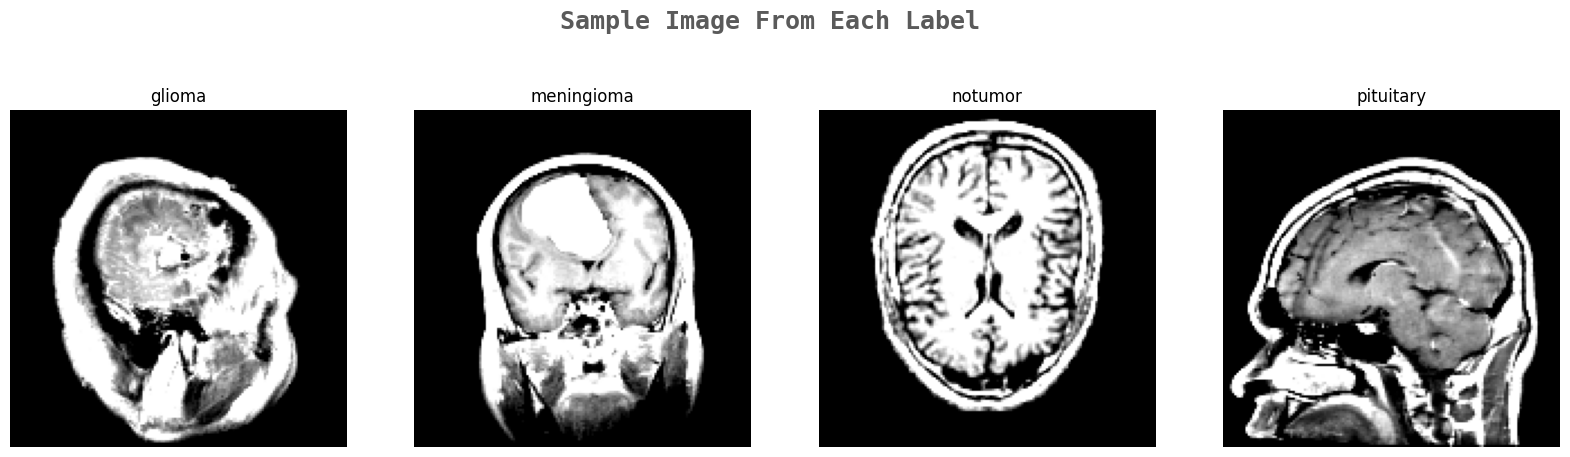

In [8]:
k = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
fig.text(s='Sample Image From Each Label', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.62, x=0.4, alpha=0.8)

for i in labels:
    for j, label in enumerate(y_train):
        if (label == i):
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k += 1
            break


plt.show()

In [9]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

## one hot encoding

In [11]:
# Convert labels to numerical values
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
  

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


## Custom CNN

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assume 3 classes representing different stages of brain tumors
num_classes = 4

# Define a Sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
# Flatten the output of the previous layer
model.add(layers.Flatten())

# Add Dense layers
# model.add(layers.Dense(64, activation='relu')) #used almost every where
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) #softmax because we know number of outputs

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary (optional)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [13]:
# history = model.fit(X_train,y_train,validation_split=0.1, epochs =15, verbose=1, batch_size=32)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/40


I0000 00:00:1711271356.348725      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


198/198 [==============================] - 19s 59ms/step - loss: 1.0322 - accuracy: 0.5315 - val_loss: 0.6770 - val_accuracy: 0.7070
Epoch 2/40
198/198 [==============================] - 9s 45ms/step - loss: 0.5454 - accuracy: 0.7801 - val_loss: 0.4889 - val_accuracy: 0.8094
Epoch 3/40
198/198 [==============================] - 9s 46ms/step - loss: 0.4289 - accuracy: 0.8304 - val_loss: 0.3656 - val_accuracy: 0.8549
Epoch 4/40
198/198 [==============================] - 9s 46ms/step - loss: 0.3422 - accuracy: 0.8680 - val_loss: 0.3224 - val_accuracy: 0.8634
Epoch 5/40
198/198 [==============================] - 9s 46ms/step - loss: 0.2851 - accuracy: 0.8905 - val_loss: 0.2869 - val_accuracy: 0.8962
Epoch 6/40
198/198 [==============================] - 9s 46ms/step - loss: 0.2316 - accuracy: 0.9127 - val_loss: 0.2397 - val_accuracy: 0.9047
Epoch 7/40
198/198 [==============================] - 9s 46ms/step - loss: 0.2047 - accuracy: 0.9229 - val_loss: 0.2123 - val_accuracy: 0.9147
Epoch 8/4

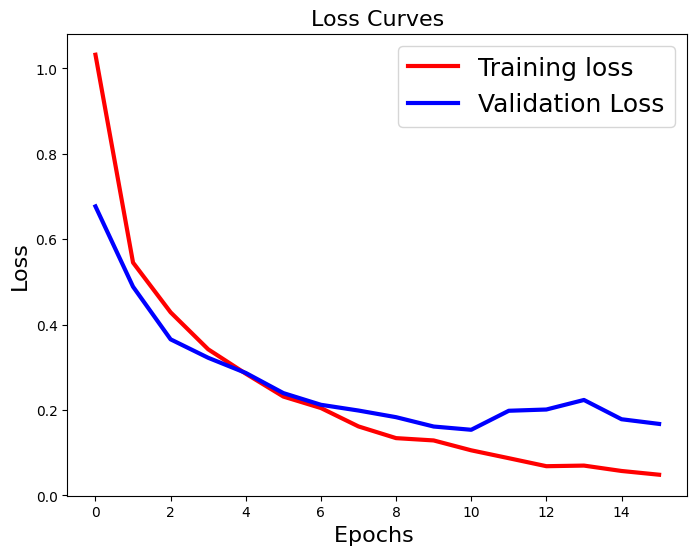

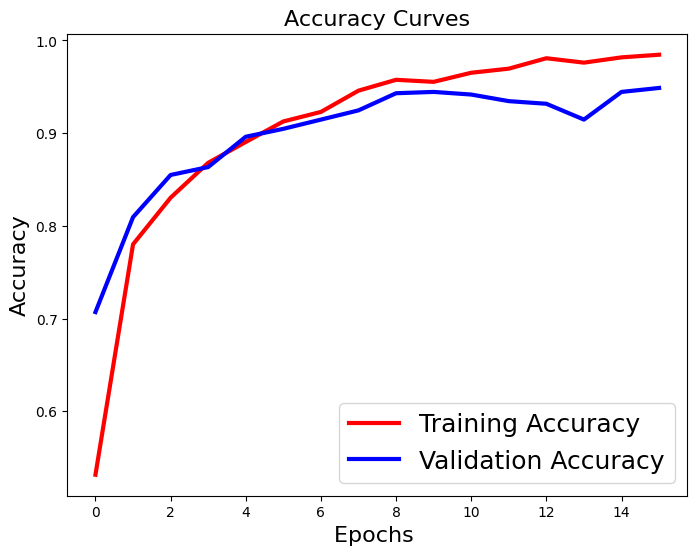

In [14]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

In [15]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

22/22 [==============================] - 0s 13ms/step


In [16]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       169
           1       0.87      0.89      0.88       161
           2       1.00      0.98      0.99       192
           3       0.97      0.97      0.97       181

    accuracy                           0.94       703
   macro avg       0.94      0.94      0.94       703
weighted avg       0.94      0.94      0.94       703



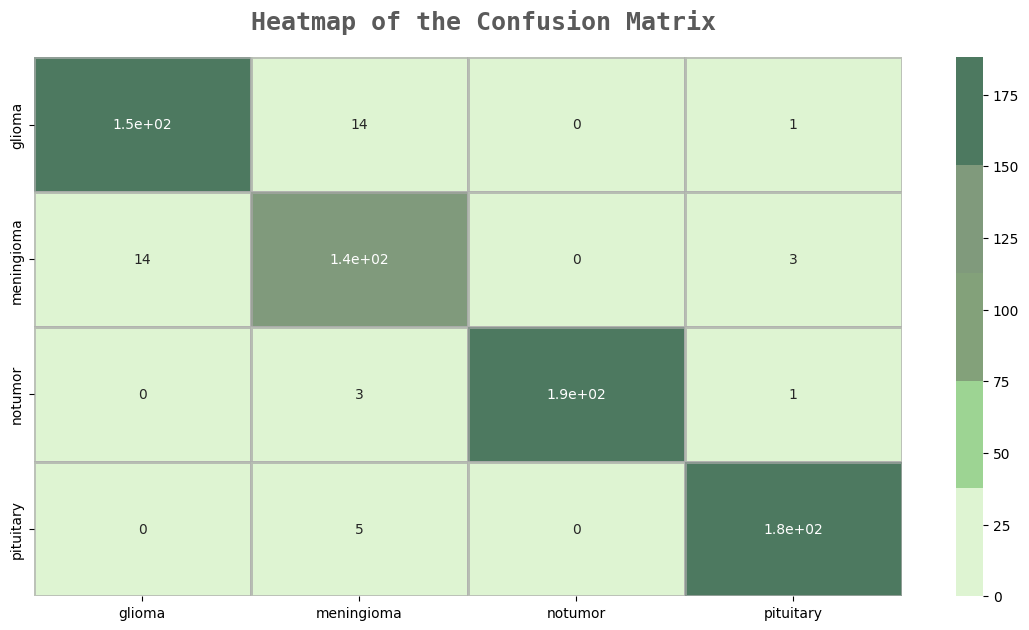

In [17]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test_new,pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_new,pred, average='weighted')
recall = recall_score(y_test_new,pred, average='weighted')
f1 = f1_score(y_test_new,pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9417
Precision: 0.9425
Recall: 0.9417
F1 Score: 0.9420


In [19]:
import sys
import joblib
import os


# Save the model to a file using joblib
model_filename = 'bb.joblib'
joblib.dump(model, model_filename)

# Get the size of the model file
model_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert to megabytes
print(f"Model size: {model_size:.2f} MB")


Model size: 2.14 MB


## Mobilenet

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping  # Optional

# Define MobileNet architecture (without pre-trained weights)
base_model = MobileNet(weights=None, include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (optional: add EarlyStopping for validation)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32)        128   

In [21]:
# history = model.fit(X_train,y_train,validation_split=0.1, epochs =15, verbose=1, batch_size=32)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/40
198/198 [==============================] - 29s 70ms/step - loss: 0.8480 - accuracy: 0.6514 - val_loss: 1.5713 - val_accuracy: 0.2731
Epoch 2/40
198/198 [==============================] - 11s 56ms/step - loss: 0.4685 - accuracy: 0.8130 - val_loss: 2.0927 - val_accuracy: 0.2731
Epoch 3/40
198/198 [==============================] - 11s 57ms/step - loss: 0.3258 - accuracy: 0.8772 - val_loss: 5.1138 - val_accuracy: 0.2731
Epoch 4/40
198/198 [==============================] - 11s 57ms/step - loss: 0.2208 - accuracy: 0.9237 - val_loss: 0.2710 - val_accuracy: 0.9061
Epoch 5/40
198/198 [==============================] - 11s 56ms/step - loss: 0.1709 - accuracy: 0.9400 - val_loss: 1.1337 - val_accuracy: 0.7326
Epoch 6/40
198/198 [==============================] - 11s 56ms/step - loss: 0.1401 - accuracy: 0.9514 - val_loss: 1.0081 - val_accuracy: 0.6970
Epoch 7/40
198/198 [==============================] - 11s 56ms/step - loss: 0.1364 - accuracy: 0.9578 - val_loss: 0.3199 - val_accuracy:

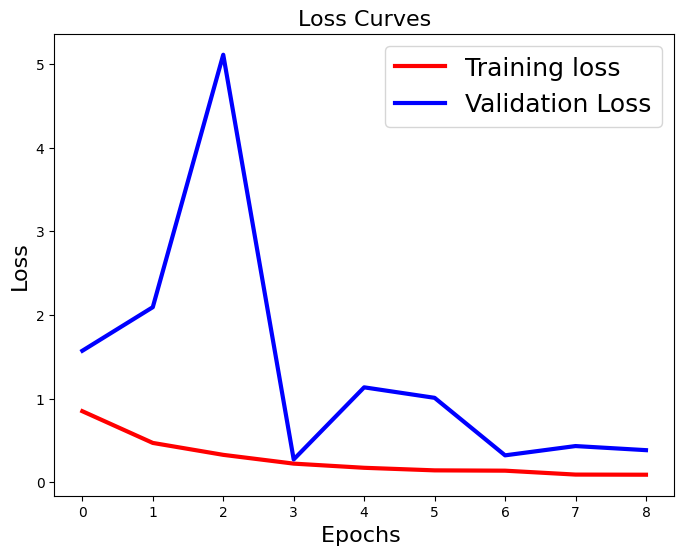

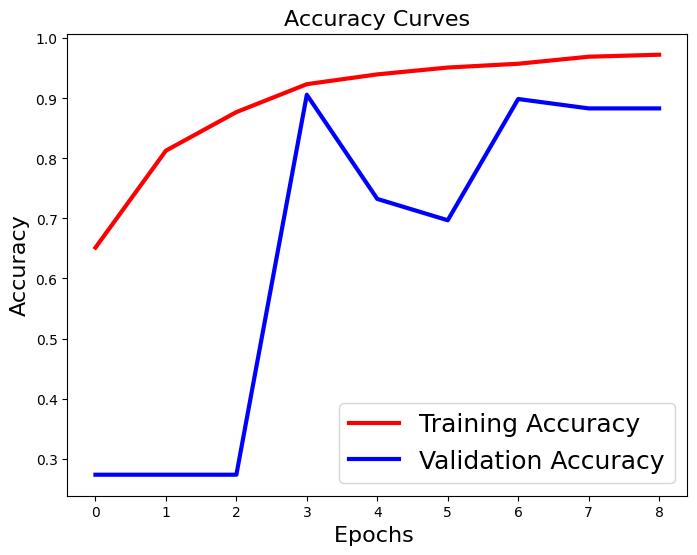

In [22]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

In [23]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

22/22 [==============================] - 1s 19ms/step


In [24]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       169
           1       0.76      0.95      0.84       161
           2       0.97      0.96      0.96       192
           3       0.96      0.94      0.95       181

    accuracy                           0.91       703
   macro avg       0.91      0.90      0.90       703
weighted avg       0.92      0.91      0.91       703



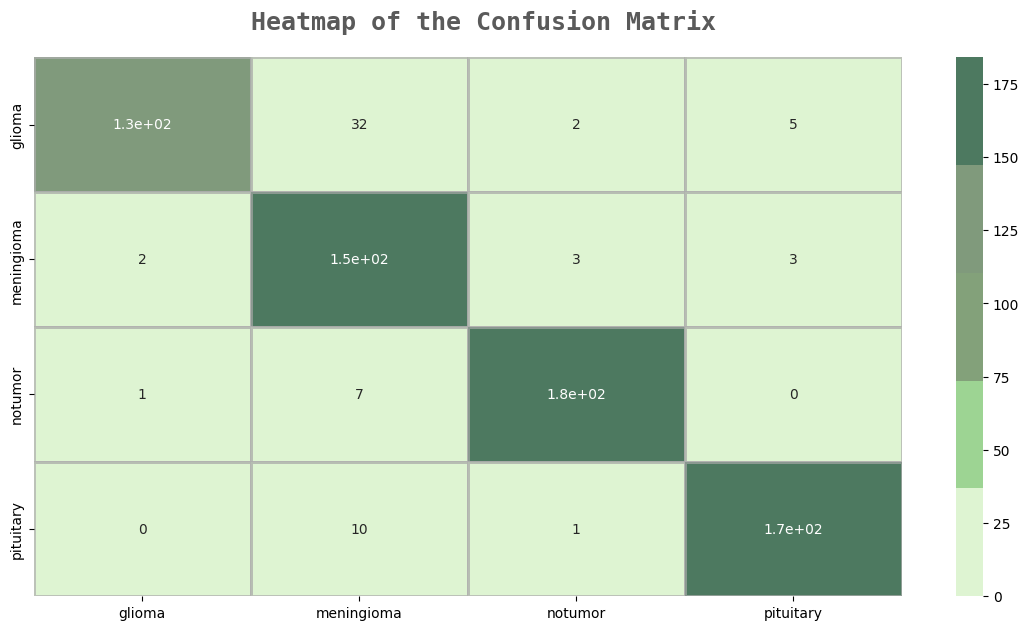

In [25]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test_new,pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_new,pred, average='weighted')
recall = recall_score(y_test_new,pred, average='weighted')
f1 = f1_score(y_test_new,pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9061
Precision: 0.9188
Recall: 0.9061
F1 Score: 0.9070


In [27]:
import sys
import joblib
import os


# Save the model to a file using joblib
model_filename = 'bb.joblib'
joblib.dump(model, model_filename)

# Get the size of the model file
model_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert to megabytes
print(f"Model size: {model_size:.2f} MB")


Model size: 49.18 MB


## Resnet 101

In [28]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101

# Load pre-trained ResNet-101 model
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a custom model on top of ResNet-101
model = models.Sequential()
model.add(base_model)

# Add a convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


171446536/171446536 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 5, 5, 2048)        42658176  
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          1179712   
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)             

In [29]:
# history = model.fit(X_train,y_train,validation_split=0.1, epochs =15, verbose=1, batch_size=32)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/40
198/198 [==============================] - 35s 129ms/step - loss: 0.6455 - accuracy: 0.7552 - val_loss: 0.5042 - val_accuracy: 0.8051
Epoch 2/40
198/198 [==============================] - 20s 103ms/step - loss: 0.3245 - accuracy: 0.8840 - val_loss: 0.3293 - val_accuracy: 0.8762
Epoch 3/40
198/198 [==============================] - 20s 101ms/step - loss: 0.2195 - accuracy: 0.9198 - val_loss: 0.3804 - val_accuracy: 0.8578
Epoch 4/40
198/198 [==============================] - 20s 102ms/step - loss: 0.1712 - accuracy: 0.9362 - val_loss: 0.2558 - val_accuracy: 0.9175
Epoch 5/40
198/198 [==============================] - 20s 101ms/step - loss: 0.1370 - accuracy: 0.9502 - val_loss: 0.5379 - val_accuracy: 0.8521
Epoch 6/40
198/198 [==============================] - 20s 102ms/step - loss: 0.0896 - accuracy: 0.9690 - val_loss: 0.2540 - val_accuracy: 0.9246
Epoch 7/40
198/198 [==============================] - 20s 101ms/step - loss: 0.1075 - accuracy: 0.9636 - val_loss: 0.3035 - val_ac

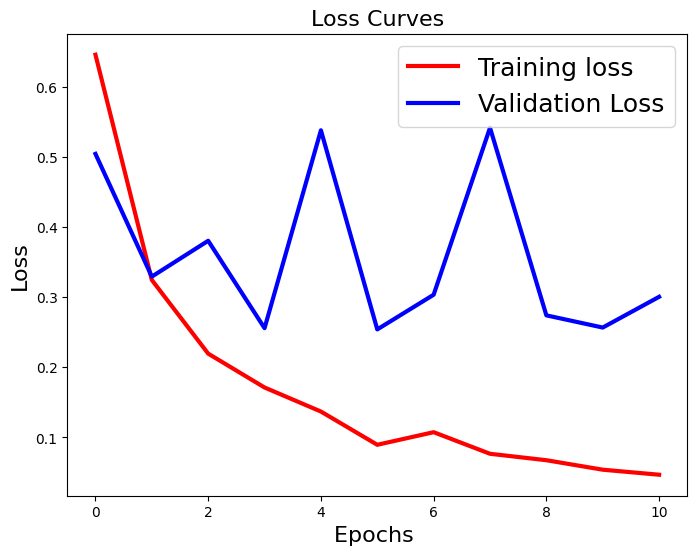

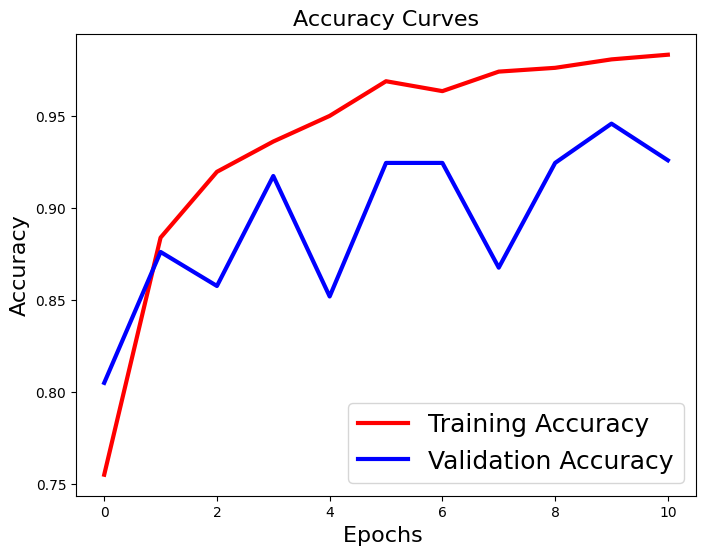

In [30]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

In [31]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

22/22 [==============================] - 4s 88ms/step


In [32]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       169
           1       0.83      0.88      0.86       161
           2       0.98      0.98      0.98       192
           3       0.96      0.96      0.96       181

    accuracy                           0.92       703
   macro avg       0.92      0.92      0.92       703
weighted avg       0.93      0.92      0.92       703



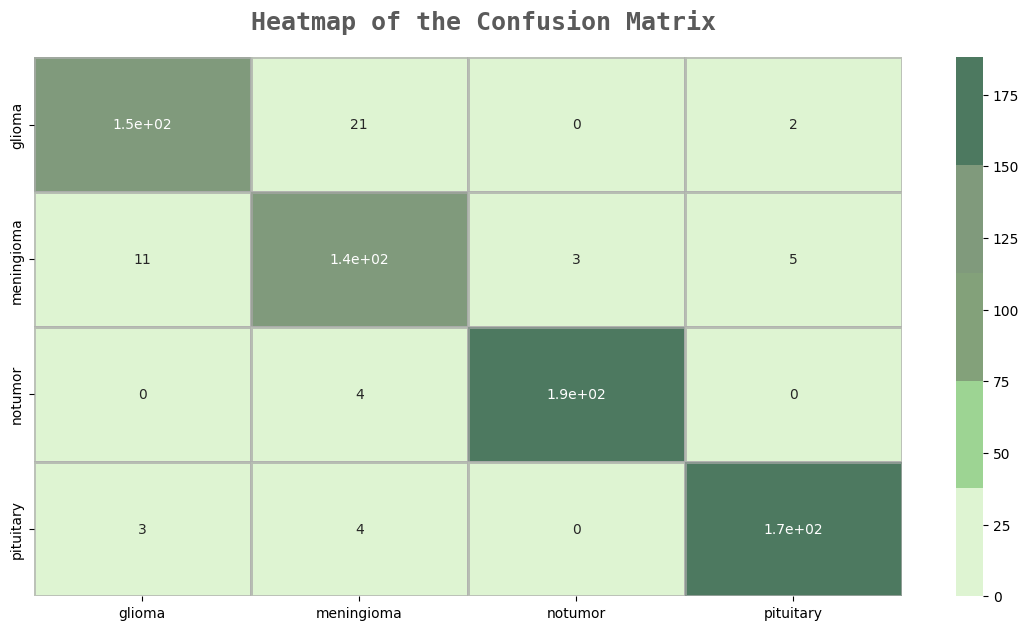

In [33]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test_new,pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_new,pred, average='weighted')
recall = recall_score(y_test_new,pred, average='weighted')
f1 = f1_score(y_test_new,pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9246
Precision: 0.9259
Recall: 0.9246
F1 Score: 0.9249


In [35]:
import sys
import joblib
import os


# Save the model to a file using joblib
model_filename = 'bb.joblib'
joblib.dump(model, model_filename)

# Get the size of the model file
model_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert to megabytes
print(f"Model size: {model_size:.2f} MB")


Model size: 177.53 MB
